## Library Importation

In [1]:
# For data manipulation
import pandas as pd 
import numpy as np

# For data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# For association analysis
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Import

In [2]:
# Declare filepath 
file = r'C:\Users\Hp\Documents\New folder\Documents\Personal\Projects\Market Basket\Market_Basket.csv'

# Import file as tuple 
with open(file) as f:
    lines = f.readlines()
    transactions = [tuple(line.strip().split(',')) for line in lines]

## Data Preprocessing & EDA

In [3]:
# Instantiate and fit encoder object
encoder = TransactionEncoder()
transactions_ = encoder.fit(transactions).transform(transactions)

In [4]:
# Print transactions array
transactions_

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [5]:
# Convert transactions array to dataframe 
transactions_df = pd.DataFrame(transactions_, columns = encoder.columns_)

In [6]:
# Check first few rows
transactions_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [7]:
# Check dimensions
transactions_df.shape

(7501, 120)

## Association Rule Mining

In [8]:
# Find and print frequent item sets 
frequent_itemsets = apriori(transactions_df, min_support = 0.03, max_len = 3, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [9]:
# Find and print association rules 
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(chocolate),0.179709,0.163845,0.033196,0.184718,1.127397,0.003751,1.025603
1,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711
2,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383
3,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827
4,(chocolate),(milk),0.163845,0.129583,0.032129,0.196094,1.513276,0.010898,1.082736
5,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
6,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
7,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
8,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581
9,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070


## Visualisation

In [10]:
# Create new column of number of antecedents antecedents
rules['lhs items'] = rules['antecedents'].apply(lambda x: len(x))
rules[rules['lhs items'] > 1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')

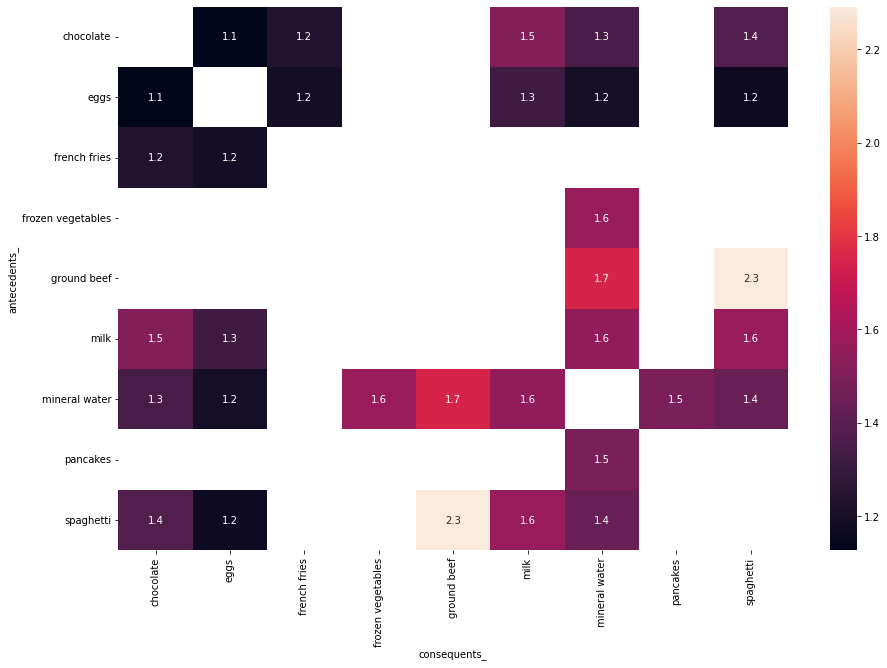

In [11]:
# Generate heatmap 
plt.figure(figsize = (15, 10))

sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()